In [54]:
#IMPORTING LIBRARIES
import csv
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [55]:
#QUESTION 1
#FINDING NUMBER OF ROWS AND COLUMNS
df = pd.read_csv('ipl_auc.csv')
print("No. of rows: ",df.shape[0])
print("No. of columns: ",df.shape[1])

No. of rows:  589
No. of columns:  17


In [56]:
#BASIC ANALYSIS
df_head = df.head()
print(df_head)
df_tail = df.tail()
print(df_tail)
df.columns = df.columns.str.replace(' ', '')
print(df.info())
print(df.shape)
print(df.describe(include="all"))

   Set No. Set Name          Player       Country State Association  Age  \
0        1        M     Trent Boult   New Zealand               NaN   32   
1        1        M     Pat Cummins     Australia               NaN   28   
2        1        M  Shikhar Dhawan         India              DDCA   36   
3        1        M    Shreyas Iyer         India               MCA   27   
4        1        M   Kagiso Rabada  South Africa               NaN   26   

    Specialism Batting               Bowling    IPL Previous IPLTeam(s)  \
0       BOWLER     RHB  LEFT ARM Fast Medium   62.0     SRH, KKR, DD,MI   
1  ALL-ROUNDER     RHB        RIGHT ARM Fast   37.0         DD, MI, KKR   
2      BATSMAN     LHB                     -  192.0    DCH, MI, SRH, DC   
3      BATSMAN     RHB    RIGHT ARM Leg Spin   87.0                  DC   
4       BOWLER     LHB        RIGHT ARM Fast   50.0                  DC   

  2021 Team   C/U/A  Base Price  Sold Price          New Franchise   Bid  
0        MI  Capp

In [57]:
#QUESTION 2
#FINDING THE NULL/MISSING VALUES IN EACH COLUMN
print(" total NaN at each column in the DataFrame :\n ",df.isnull().sum())
print(" total NaN in The DataFrame :\n ",df.isnull().sum().sum())
df.dropna(inplace=True)

#OUTLIERS:
q1,q3=df.IPL.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)
outlying_data=df[(df.IPL<lower)|(df.IPL>upper)]
outlying_data.index.values

 total NaN at each column in the DataFrame :
  SetNo.                  0
SetName                 0
Player                  0
Country                 0
StateAssociation      220
Age                     0
Specialism              0
Batting                 0
Bowling                 0
IPL                   319
PreviousIPLTeam(s)    324
2021Team              424
C/U/A                   0
BasePrice               0
SoldPrice             385
NewFranchise          385
Bid                     0
dtype: int64
 total NaN in The DataFrame :
  2057


array([ 2,  6, 15, 26, 29])

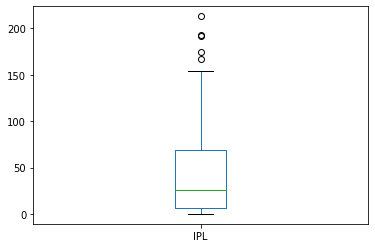

In [58]:
#OUTLIER ANALYSIS
#PLOTTING BOX PLOT
IPL_BoxPlot = df.boxplot( column =['IPL'], grid = False)


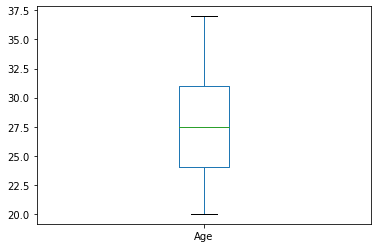

In [59]:
Age_BoxPlot = df.boxplot( column =['Age'], grid = False)

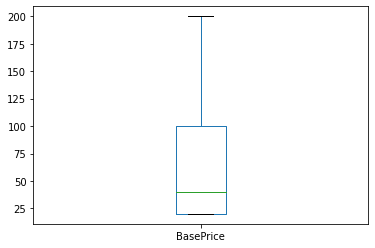

In [60]:
BasePrice_BoxPlot = df.boxplot( column =['BasePrice'], grid = False)

In [61]:
#QUESTION 3
#FINDING DUPLICATE DATA
print("Duplicated Values in Specialism:\n",df['Specialism'].duplicated())
print("Duplicated Values in Batting:\n",df['Batting'].duplicated())
print("Duplicated Values in Bowling:\n",df['Bowling'].duplicated())
print("Duplicated Values in Player:\n",df['Player'].duplicated())
print("Duplicated Values in Number of IPL matches played:\n",df['IPL'].duplicated())
#INCONSISTENT DATA:
print(df.dtypes)
#IPL datatype should be int64
#Converting 
df.IPL = df.IPL.apply(int)
df.SoldPrice = df.SoldPrice.apply(float)

Duplicated Values in Specialism:
 2      False
3       True
5      False
6      False
12      True
       ...  
201     True
203     True
205     True
213     True
503     True
Name: Specialism, Length: 84, dtype: bool
Duplicated Values in Batting:
 2      False
3      False
5       True
6       True
12      True
       ...  
201     True
203     True
205     True
213     True
503     True
Name: Batting, Length: 84, dtype: bool
Duplicated Values in Bowling:
 2      False
3      False
5      False
6      False
12      True
       ...  
201     True
203     True
205     True
213     True
503     True
Name: Bowling, Length: 84, dtype: bool
Duplicated Values in Player:
 2      False
3      False
5      False
6      False
12     False
       ...  
201    False
203    False
205    False
213    False
503    False
Name: Player, Length: 84, dtype: bool
Duplicated Values in Number of IPL matches played:
 2      False
3      False
5      False
6      False
12     False
       ...  
201     True
2

In [62]:
#QUESTION 4
#CORRELATION ANALYSIS
print(df.corr(method='pearson'))

             SetNo.       Age       IPL  BasePrice  SoldPrice
SetNo.     1.000000 -0.296000 -0.413219  -0.490229  -0.468649
Age       -0.296000  1.000000  0.725228   0.510550   0.065158
IPL       -0.413219  0.725228  1.000000   0.724612   0.313325
BasePrice -0.490229  0.510550  0.724612   1.000000   0.634683
SoldPrice -0.468649  0.065158  0.313325   0.634683   1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

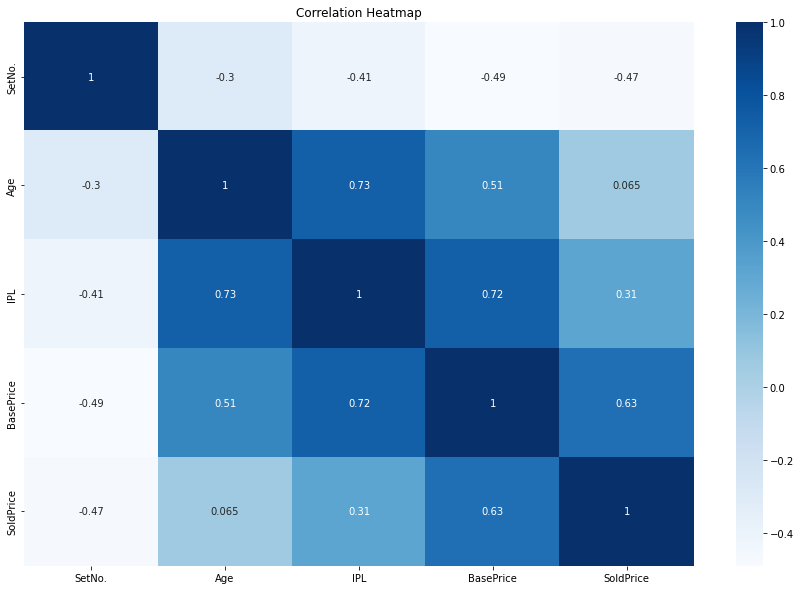

In [63]:
#PLOTTING HEATMAP FOR CORRELATION ANALYSIS
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson'), annot = True, cmap="Blues")
plt.title("Correlation Heatmap")

In [64]:
#QUESTION 5
#PRE PROCESSING OF INCONSISTENT DATA
df2 = df[df["SoldPrice"].notna()] #dropping null values from column Sold Price
df['SoldPrice'].isnull().sum()
print(df.corr(method='pearson'))
'''Since Base Price has high correlation we will drop the feature Base Price'''
df.drop(['BasePrice'], axis=1)
'''We will not be using Data- dimensionality or range transformation as the Dataset is not huge and range of values of features need not be within -1 to 1 range'''



             SetNo.       Age       IPL  BasePrice  SoldPrice
SetNo.     1.000000 -0.296000 -0.413219  -0.490229  -0.468649
Age       -0.296000  1.000000  0.725228   0.510550   0.065158
IPL       -0.413219  0.725228  1.000000   0.724612   0.313325
BasePrice -0.490229  0.510550  0.724612   1.000000   0.634683
SoldPrice -0.468649  0.065158  0.313325   0.634683   1.000000


'We will not be using Data- dimensionality or range transformation as the Dataset is not huge and range of values of features need not be within -1 to 1 range'

In [65]:
#QUESTION 6
Roles = print(f"Dataset contains data of \033[1m{df.Specialism.unique().size}\033[0m Roles")
print(df.Specialism.unique())

Teams = print(f"Dataset contains data of \033[1m{df.NewFranchise.unique().size}\033[0m Teams")
print(df.NewFranchise.unique())

'''From this graph we can visualise that The AGE for Wicketkeepers is the highest'''

#PCA 
'''PCA does help visualize the data as it helps in overcoming the overfitting issue by reducing the number of features. 
It is very hard to visualize and understand the data in high dimensions. 
PCA transforms a high dimensional data to low dimensional data (2 or 3 dimension) so that it can be visualized easily
But for our dataset we will not be using PCA as the dimensions of our dataset is not that large. '''



Dataset contains data of 4 Roles
['BATSMAN' 'BOWLER' 'ALL-ROUNDER' 'WICKETKEEPER']
Dataset contains data of 11 Teams
['Punjab Kings' 'Kolkata Knight Riders' 'Gujarat Titans'
 'Rajasthan Royals' 'Lucknow Super Giants' 'Chennai Super Kings'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad' 'Mumbai Indians'
 'Delhi Capitals' 'Luknow Super Giants']


'PCA does help visualize the data as it helps in overcoming the overfitting issue by reducing the number of features. \nIt is very hard to visualize and understand the data in high dimensions. \nPCA transforms a high dimensional data to low dimensional data (2 or 3 dimension) so that it can be visualized easily\nBut for our dataset we will not be using PCA as the dimensions of our dataset is not that large. '

<BarContainer object of 84 artists>


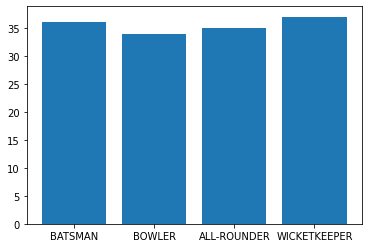

In [66]:
#BAR CHART 
print(plt.bar(df.Specialism,df.Age))


<BarContainer object of 84 artists>


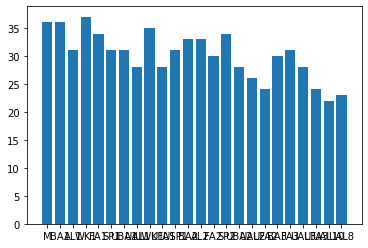

In [67]:
print(plt.bar(df.SetName,df.Age))

<BarContainer object of 84 artists>


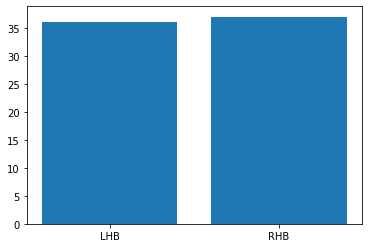

In [68]:
print(plt.bar(df.Batting,df.Age))

<BarContainer object of 84 artists>


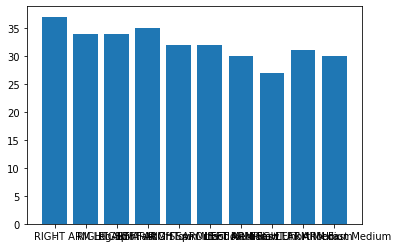

In [69]:
print(plt.bar(df.Bowling,df.Age))

<BarContainer object of 84 artists>


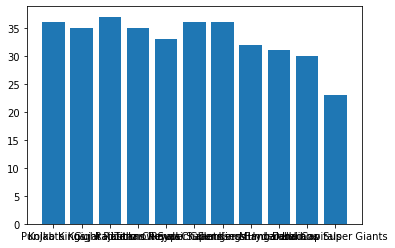

In [76]:
print(plt.bar(df.NewFranchise,df.Age))

AxesSubplot(0.125,0.125;0.775x0.755)


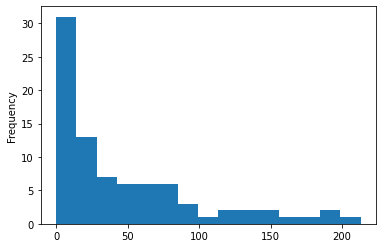

In [70]:
#HISTOGRAM
print(df['IPL'].plot(kind='hist',bins=15))

AxesSubplot(0.125,0.125;0.775x0.755)


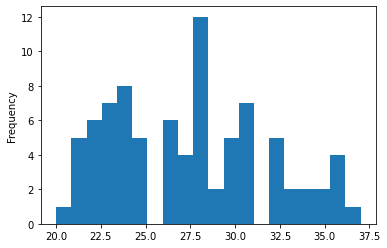

In [71]:
print(df['Age'].plot(kind='hist',bins=20))

AxesSubplot(0.125,0.125;0.775x0.755)


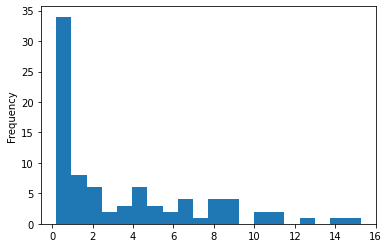

In [73]:
print(df['SoldPrice'].plot(kind='hist',bins=20))


AxesSubplot(0.125,0.125;0.775x0.755)


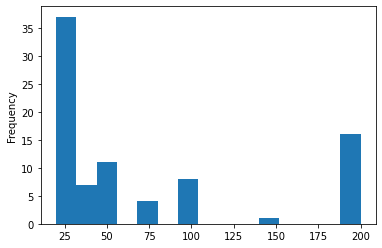

In [75]:
print(df['BasePrice'].plot(kind='hist',bins=15))